In [18]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, add_changepoints_to_plot
# from keras.models import Sequential
# from keras.layers import Dense

# from keras.optimizers import Adam

warnings.filterwarnings('ignore')
czech  = pd.read_csv('univariate_models/univariate_df_Czechia.csv')
eston  = pd.read_csv('univariate_models/univariate_df_Estonia.csv')
franc  = pd.read_csv('univariate_models/univariate_df_France.csv')
malay  = pd.read_csv('univariate_models/univariate_df_Malaysia.csv')
belgi  = pd.read_csv('univariate_models/univariate_df_Belgium.csv')
chile  = pd.read_csv('univariate_models/univariate_df_Chile.csv')
irela  = pd.read_csv('univariate_models/univariate_df_Ireland.csv')
israe  = pd.read_csv('univariate_models/univariate_df_Israel.csv')
italy  = pd.read_csv('univariate_models/univariate_df_Italy.csv')
us  = pd.read_csv('univariate_models/univariate_df_United_States.csv')

# setting index to the date time value 
for c in [czech, eston, franc, malay,belgi, chile, irela, israe, italy, us]:
    c['date'] = pd.to_datetime(c['date'])

#only certain columns
czech= czech.set_index('date')
eston =eston.set_index('date')
franc =franc.set_index('date')
malay = malay.set_index('date')
belgi = belgi.set_index('date')
chile =chile.set_index('date')
irela = irela.set_index('date')
isrea = israe.set_index('date')
italy = italy.set_index('date')
us = us.set_index('date')

  
#sort index
for x in [czech, eston, franc, malay,belgi, chile, irela, israe, italy, us]:
    x = x.sort_index()
train_size = int(len(czech) * 0.8)
czech_train, czech_test = czech[0:train_size]['new_deaths'], czech[train_size:]['new_deaths']
eston_train, eston_test = eston[0:train_size]['new_deaths'], eston[train_size:]['new_deaths']
franc_train, franc_test = franc[0:train_size]['new_deaths'], franc[train_size:]['new_deaths']
malay_train, malay_test = malay[0:train_size]['new_deaths'], malay[train_size:]['new_deaths']
belgi_train, belgi_test = belgi[0:train_size]['new_deaths'], belgi[train_size:]['new_deaths']
chile_train, chile_test = chile[0:train_size]['new_deaths'], chile[train_size:]['new_deaths']
irela_train, irela_test = irela[0:train_size]['new_deaths'], irela[train_size:]['new_deaths']
israe_train, israe_test = israe[0:train_size]['new_deaths'], israe[train_size:]['new_deaths']
italy_train, italy_test = italy[0:train_size]['new_deaths'], italy[train_size:]['new_deaths']
us_train, us_test = us[0:train_size]['new_deaths'], us[train_size:]['new_deaths']
us_test

date
2023-04-02    1746.0
2023-04-09    1729.0
2023-04-16    1290.0
2023-04-23    1198.0
2023-04-30    1046.0
2023-05-07    1146.0
2023-05-14    1943.0
2023-05-21     755.0
2023-05-28     738.0
2023-06-04     689.0
2023-06-11     631.0
2023-06-18     609.0
2023-06-25     576.0
2023-07-02     540.0
2023-07-09     487.0
2023-07-16     507.0
2023-07-23     535.0
2023-07-30     545.0
2023-08-06     670.0
2023-08-13     749.0
2023-08-20     915.0
2023-08-27    1052.0
2023-09-03    1181.0
2023-09-10    1301.0
2023-09-17    1396.0
2023-09-24    1402.0
2023-10-01    1437.0
2023-10-08    1374.0
2023-10-15    1291.0
2023-10-22    1355.0
2023-10-29    1270.0
2023-11-05    1218.0
2023-11-12    1353.0
2023-11-19    1380.0
2023-11-26    1356.0
2023-12-03    1605.0
2023-12-10    1614.0
2023-12-17    1450.0
2023-12-24    1263.0
2023-12-31     839.0
2024-01-07       0.0
Name: new_deaths, dtype: float64

In [19]:
def mean_absolute_scaled_error(y_true, y_pred):
    naive_forecast = np.array(y_true[:-1])
    y_true_insample = np.array(y_true[1:])
    insample_error = np.abs(y_true_insample - naive_forecast)
    # Calculate the forecast errors
    forecast_error = np.abs(y_true - y_pred)
    # Calculate the MASE
    mase = np.mean(forecast_error) / np.mean(insample_error)
    return mase

In [20]:
metrics_df = pd.DataFrame(columns=['Model', 'MAE', 'MASE'])
metrics_df

,Model,MAE,MASE


1809.3684368735842


Text(0, 0.5, 'New Deaths')

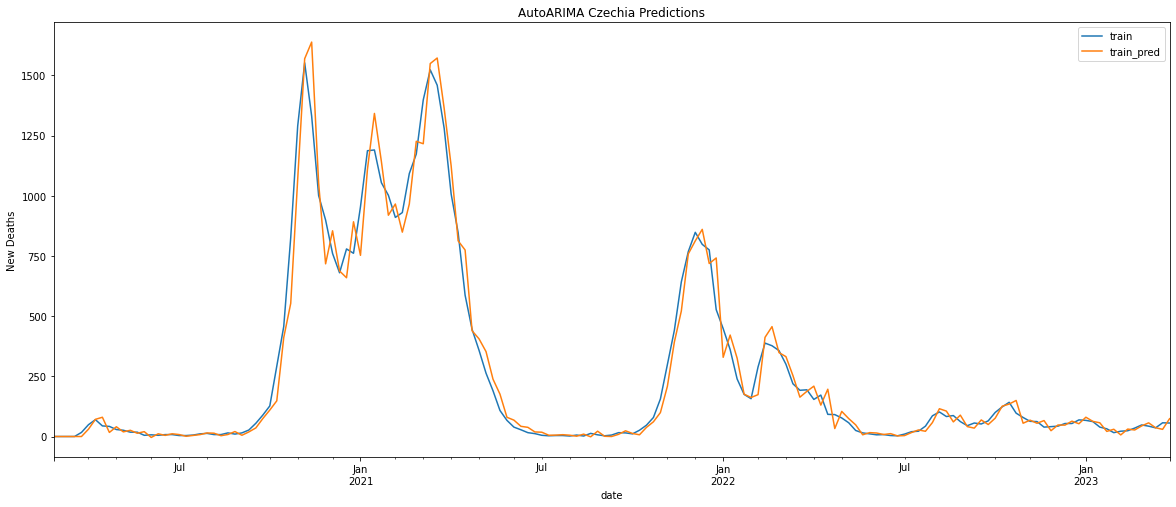

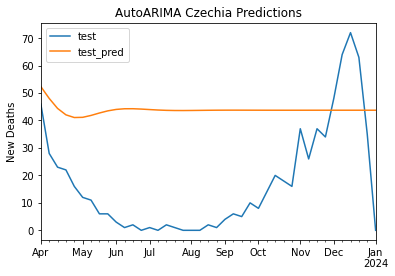

In [39]:
# making auto arima 
from pmdarima import auto_arima
model = auto_arima(czech_train, seasonal=True, m=13,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           random=True)
print(model.aic())

train_pred=model.fittedvalues()
pd.concat([czech_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])
plt.title('AutoARIMA Czechia Predictions')
plt.ylabel('New Deaths')


test_pred=model.predict(n_periods=len(czech_test))
pd.concat([czech_test, test_pred], axis=1).plot()
plt.legend(['test', 'test_pred'])
plt.title('AutoARIMA Czechia Predictions')
plt.ylabel('New Deaths')

In [40]:
actuals = czech_test
predictions = test_pred 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['autoarima czech',mae, mase]

1284.1878399750644


Text(0, 0.5, 'New Deaths')

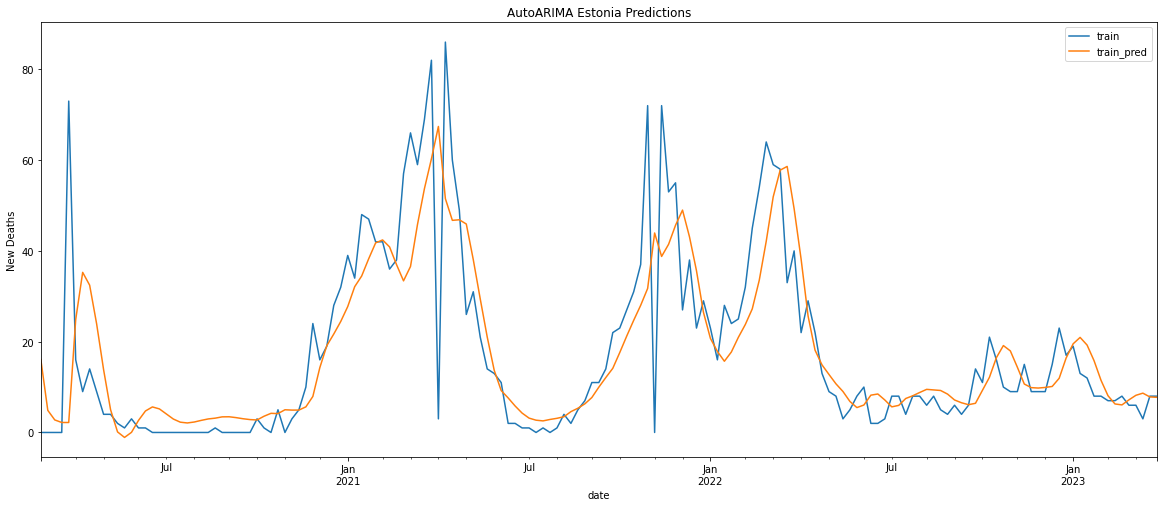

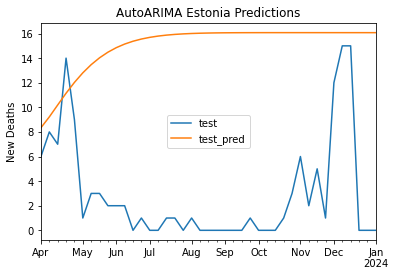

In [42]:
model = auto_arima(eston_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

train_pred=model.fittedvalues()
pd.concat([eston_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])
plt.title('AutoARIMA Estonia Predictions')
plt.ylabel('New Deaths')


test_pred=model.predict(n_periods=len(czech_test))
pd.concat([eston_test, test_pred], axis=1).plot()
plt.legend(['test', 'test_pred'])
plt.title('AutoARIMA Estonia Predictions')
plt.ylabel('New Deaths')

In [43]:
actuals = eston_test
predictions = test_pred 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['autoarima estonia',mae, mase]

In [44]:
metrics_df

,Model,MAE,MASE
0,autoarima czech,30.765835,5.085262
1,autoarima estonia,5.695730,2.778405
2,autoarima france,267.688399,22.307367
3,autoarima malaysia,42.058460,7.378677
4,autoarima belgium,78.293347,29.826037
5,autoarima chile,38.235069,4.551794
6,autoarima Ireland,5.290097,1.143805
7,autoarima Israel,12.382611,3.994391
8,autoarima italy,567.599896,16.511997
9,autoarima US,1419.090368,8.858242


2158.063722862943


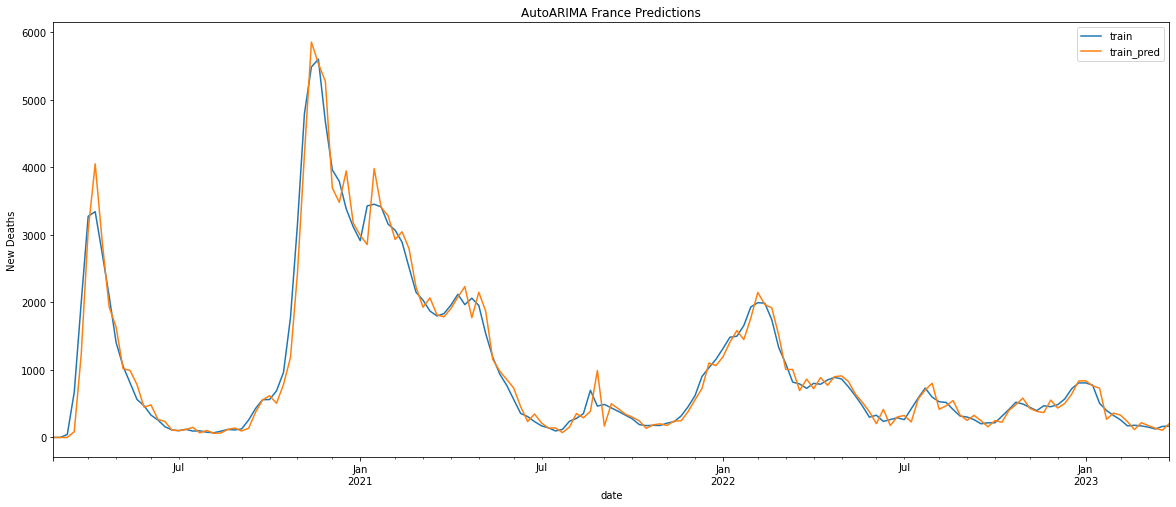

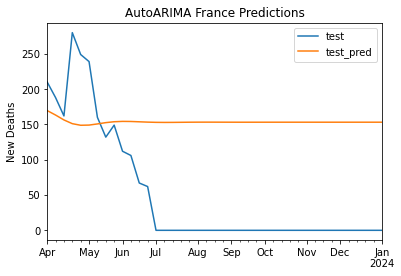

In [45]:
model = auto_arima(franc_train, seasonal=True, m=13,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           random=True)
print(model.aic())

train_pred=model.fittedvalues()
pd.concat([franc_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])
plt.title('AutoARIMA France Predictions')
plt.ylabel('New Deaths')


test_pred=model.predict(n_periods=len(czech_test))
pd.concat([franc_test, test_pred], axis=1).plot()
plt.legend(['test', 'test_pred'])
plt.title('AutoARIMA France Predictions')
plt.ylabel('New Deaths')

actuals = franc_test
predictions = test_pred 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['autoarima france',mae, mase]

1926.5469288402055


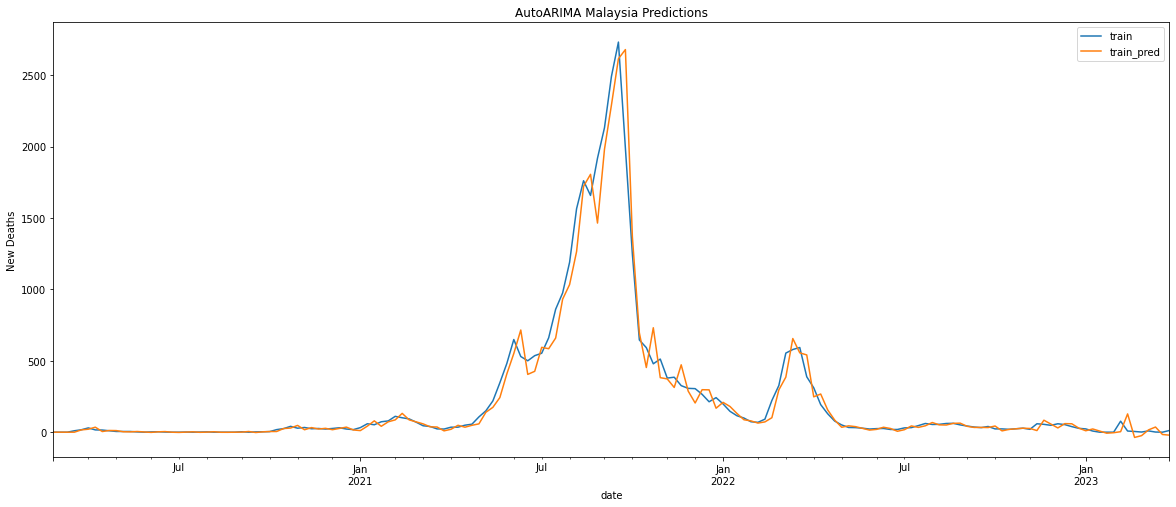

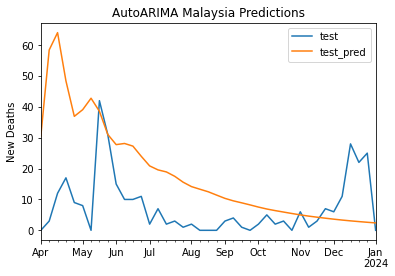

In [46]:
model = auto_arima(malay_train, seasonal=True, m=13,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           random=True)
print(model.aic())

train_pred=model.fittedvalues()
pd.concat([malay_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])
plt.title('AutoARIMA Malaysia Predictions')
plt.ylabel('New Deaths')


test_pred=model.predict(n_periods=len(czech_test))
pd.concat([malay_test, test_pred], axis=1).plot()
plt.legend(['test', 'test_pred'])
plt.title('AutoARIMA Malaysia Predictions')
plt.ylabel('New Deaths')

actuals = malay_test
predictions = test_pred 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['autoarima malaysia',mae, mase]

1834.1075298207907


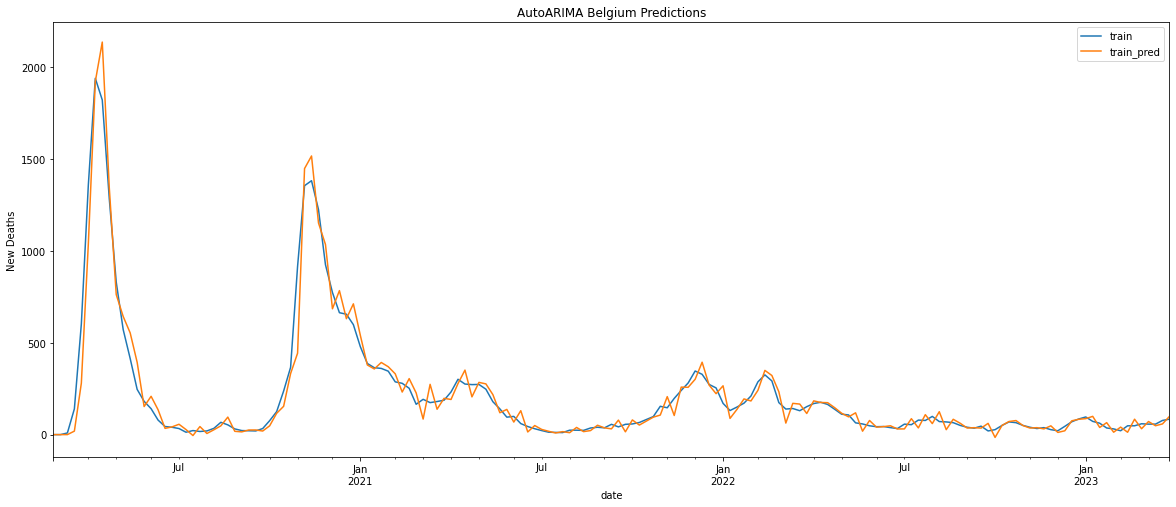

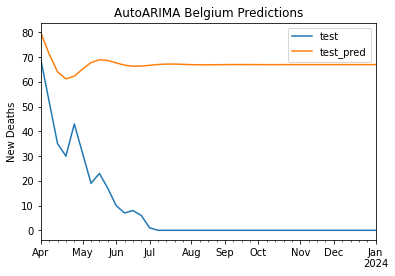

In [47]:
model = auto_arima(belgi_train, seasonal=True, m=13,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           random=True)
print(model.aic())

train_pred=model.fittedvalues()
pd.concat([belgi_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])
plt.title('AutoARIMA Belgium Predictions')
plt.ylabel('New Deaths')


test_pred=model.predict(n_periods=len(czech_test))
pd.concat([belgi_test, test_pred], axis=1).plot()
plt.legend(['test', 'test_pred'])
plt.title('AutoARIMA Belgium Predictions')
plt.ylabel('New Deaths')

actuals = belgi_test
predictions = test_pred 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['autoarima belgium',mae, mase]

2668.5274253359075


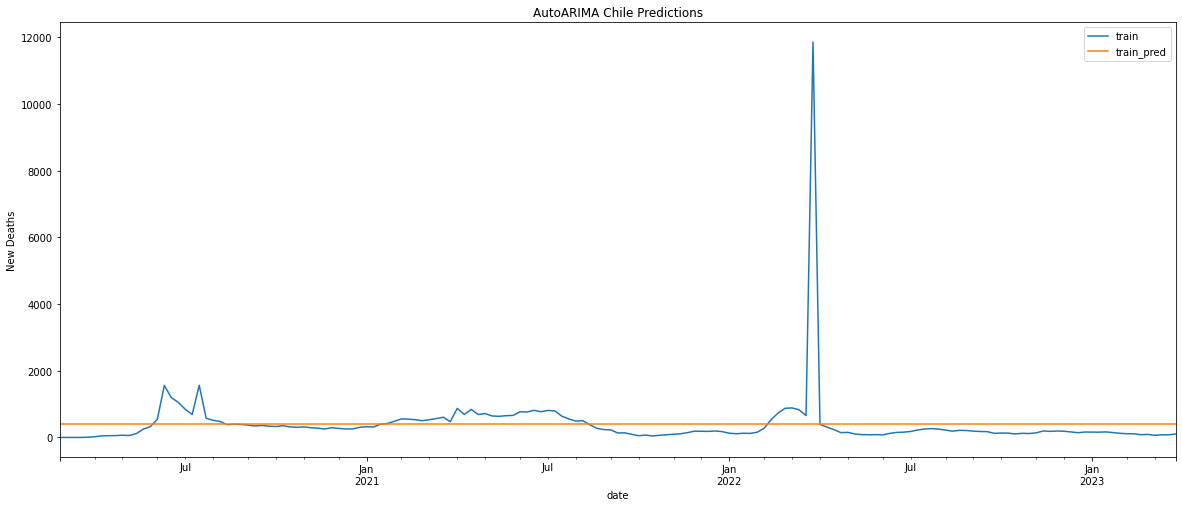

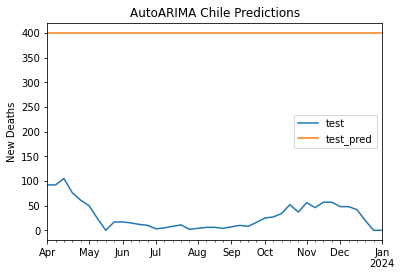

In [48]:
model = auto_arima(chile_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

train_pred=model.fittedvalues()
pd.concat([chile_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])
plt.title('AutoARIMA Chile Predictions')
plt.ylabel('New Deaths')


test_pred=model.predict(n_periods=len(czech_test))
pd.concat([chile_test, test_pred], axis=1).plot()
plt.legend(['test', 'test_pred'])
plt.title('AutoARIMA Chile Predictions')
plt.ylabel('New Deaths')

actuals = chile_test
predictions = test_pred 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['autoarima chile',mae, mase]

1475.7059754520053


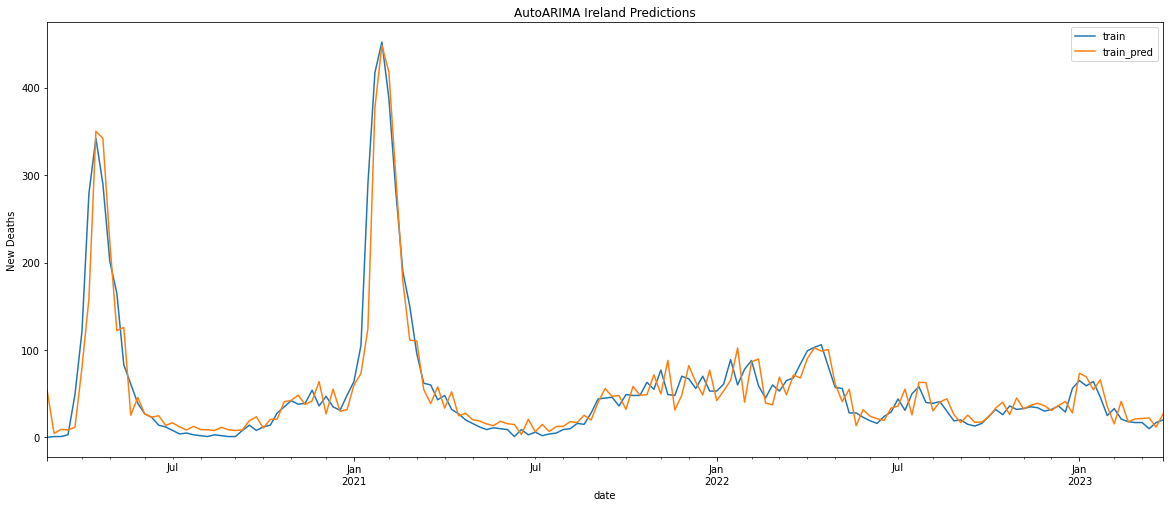

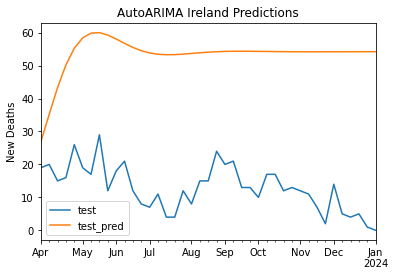

In [49]:
model = auto_arima(irela_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

train_pred=model.fittedvalues()
pd.concat([irela_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])
plt.title('AutoARIMA Ireland Predictions')
plt.ylabel('New Deaths')


test_pred=model.predict(n_periods=len(czech_test))
pd.concat([irela_test, test_pred], axis=1).plot()
plt.legend(['test', 'test_pred'])
plt.title('AutoARIMA Ireland Predictions')
plt.ylabel('New Deaths')

actuals = irela_test
predictions = test_pred 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['autoarima Ireland',mae, mase]

1472.5391319313874


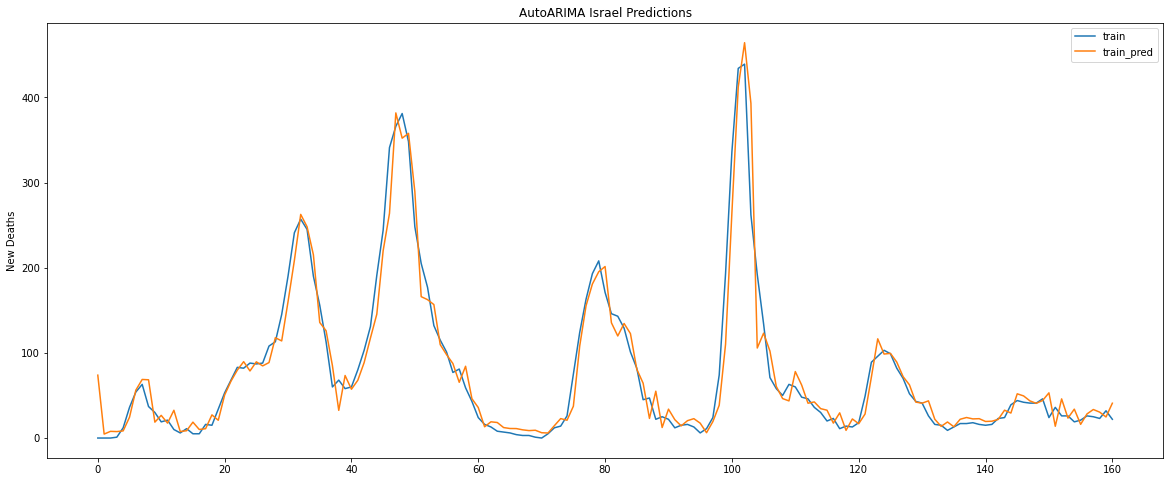

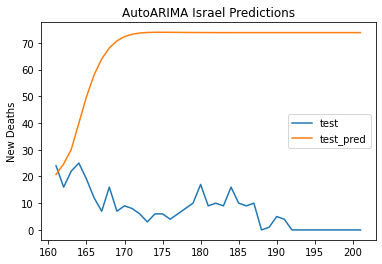

In [50]:
model = auto_arima(israe_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

train_pred=model.fittedvalues()
pd.concat([israe_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])
plt.title('AutoARIMA Israel Predictions')
plt.ylabel('New Deaths')


test_pred=model.predict(n_periods=len(czech_test))
pd.concat([israe_test, test_pred], axis=1).plot()
plt.legend(['test', 'test_pred'])
plt.title('AutoARIMA Israel Predictions')
plt.ylabel('New Deaths')

actuals = israe_test
predictions = test_pred 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['autoarima Israel',mae, mase]

2266.8447993721247


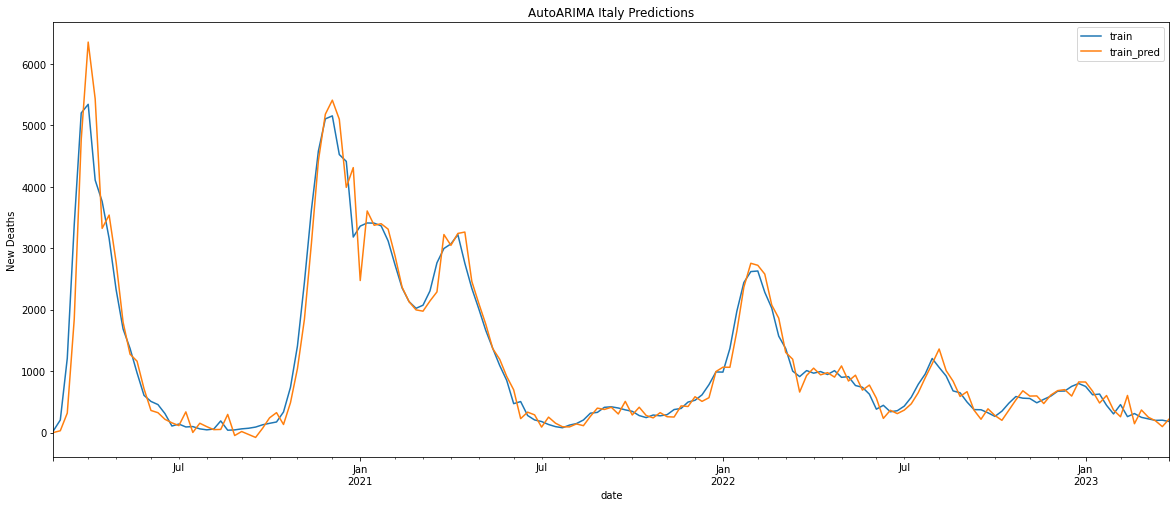

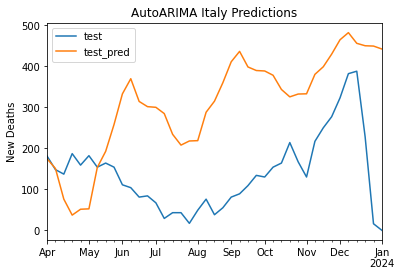

In [51]:
model = auto_arima(italy_train, seasonal=True, m=13,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           random=True)
print(model.aic())

train_pred=model.fittedvalues()
pd.concat([italy_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])
plt.title('AutoARIMA Italy Predictions')
plt.ylabel('New Deaths')


test_pred=model.predict(n_periods=len(czech_test))
pd.concat([italy_test, test_pred], axis=1).plot()
plt.legend(['test', 'test_pred'])
plt.title('AutoARIMA Italy Predictions')
plt.ylabel('New Deaths')

actuals = italy_test
predictions = test_pred 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['autoarima italy',mae, mase]

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[13]             : AIC=inf, Time=2.36 sec
 ARIMA(0,1,0)(0,1,0)[13]             : AIC=2686.377, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[13]             : AIC=2630.420, Time=1.40 sec
 ARIMA(0,1,1)(0,1,1)[13]             : AIC=inf, Time=1.52 sec
 ARIMA(1,1,0)(0,1,0)[13]             : AIC=2666.945, Time=0.25 sec
 ARIMA(1,1,0)(2,1,0)[13]             : AIC=2598.225, Time=6.90 sec
 ARIMA(1,1,0)(2,1,1)[13]             : AIC=inf, Time=13.67 sec
 ARIMA(1,1,0)(1,1,1)[13]             : AIC=inf, Time=2.36 sec
 ARIMA(0,1,0)(2,1,0)[13]             : AIC=2603.018, Time=1.80 sec
 ARIMA(2,1,0)(2,1,0)[13]             : AIC=2580.002, Time=9.24 sec
 ARIMA(2,1,0)(1,1,0)[13]             : AIC=2610.643, Time=2.16 sec
 ARIMA(2,1,0)(2,1,1)[13]             : AIC=inf, Time=10.14 sec
 ARIMA(2,1,0)(1,1,1)[13]             : AIC=inf, Time=5.18 sec
 ARIMA(3,1,0)(2,1,0)[13]             : AIC=2581.382, Time=20.08 sec
 ARIMA(2,1,1)(2,1,0)[13]             : AIC=258

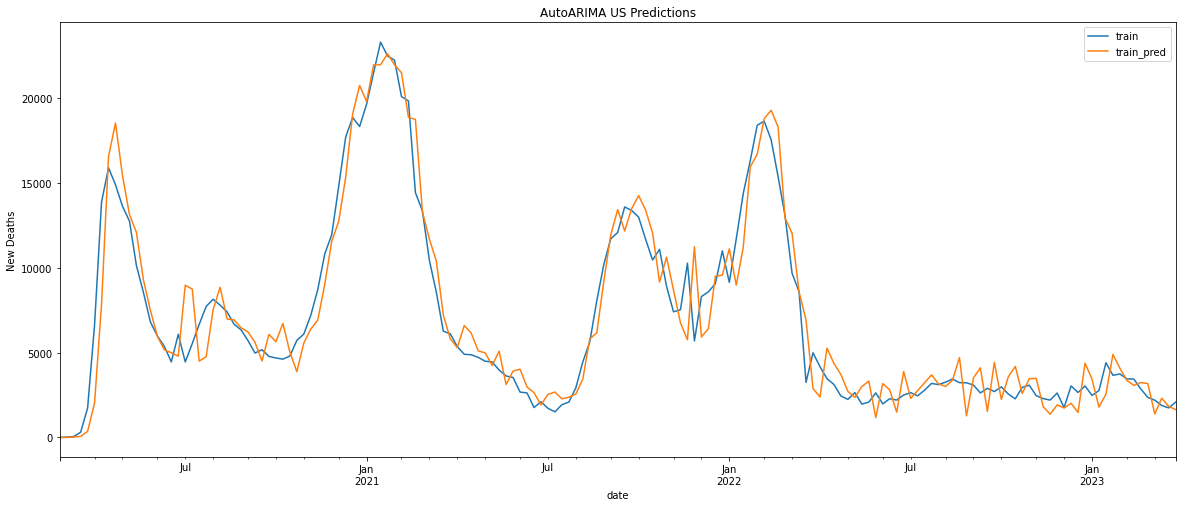

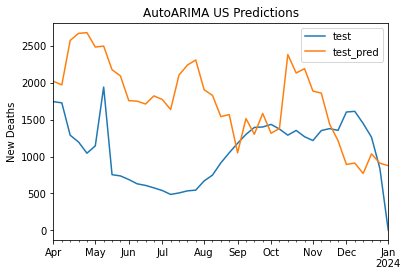

In [54]:
model = auto_arima(us_train, seasonal=True, m=13,
                           start_p=1, start_q=1,
                           max_p=3, max_q=3, 
                           start_P=0, 
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

train_pred=model.fittedvalues()
pd.concat([us_train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])
plt.title('AutoARIMA US Predictions')
plt.ylabel('New Deaths')


test_pred=model.predict(n_periods=len(czech_test))
pd.concat([us_test, test_pred], axis=1).plot()
plt.legend(['test', 'test_pred'])
plt.title('AutoARIMA US Predictions')
plt.ylabel('New Deaths')

actuals = us_test
predictions = test_pred 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['autoarima US',mae, mase]

In [55]:
metrics_df

,Model,MAE,MASE
0,autoarima czech,30.765835,5.085262
1,autoarima estonia,5.695730,2.778405
2,autoarima france,267.688399,22.307367
3,autoarima malaysia,42.058460,7.378677
4,autoarima belgium,78.293347,29.826037
5,autoarima chile,38.235069,4.551794
6,autoarima Ireland,5.290097,1.143805
7,autoarima Israel,12.382611,3.994391
8,autoarima italy,567.599896,16.511997
9,autoarima US,1419.090368,8.858242
